---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 7

---

Please write your full name here
- **Name** : "Nouran Mahmoud Mahmoud Mohammed Khattab"

# Part 1 Clustering

In this part of the assignment, you will be exploring kmeans algorithms for clustering

--------------------

The k-means clustering is first given the wanted number of clusters, say k, as a hyperparameter. Next, to start the algorithm, k points from the data set are chosen randomly as cluster centres. Then the following phases are repeated iteratively:

- Any data point is set to belong to a cluster, whose centre is closest to it
- Then for each cluster a new centre is chosen as the average of the data points in the cluster
This procedure is repeated until the clusters no longer change. This kind of algorithm is called an Expectation-Maximization (EM) algorithm, which is known to converge.

In [ ]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [ ]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

## Question 0
Set random seed to 100

In [ ]:
# For NumPy
np.random.seed(100)


## Question 1
Scatter plot the dataset

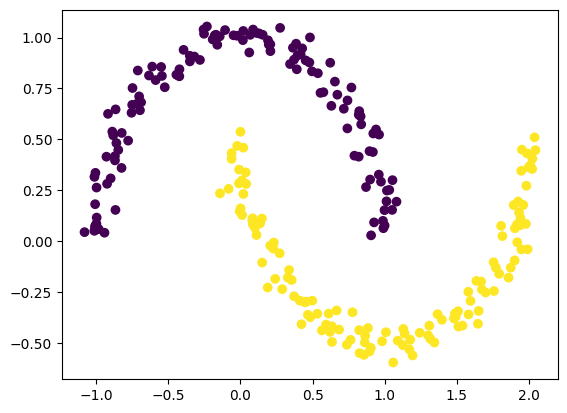

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

**ANSWER:**

K-Means tends to produce spherical or circular clusters.
Based on the shape and distribution of the make_moons dataset, K-Means will likely struggle to accurately separate the two classes.

## Question 3
1. Use Elbow method to find best "k". (Use inertia as metric). Use a range of K from the 1 to 15
2. Plot the elbow graph.
3. Train SKlearn KMeans model using the **best k** you found.
4. Scatter plot the results and **color** the clusters

**NOTE**

If you get a memory leak warning, please follow the following link: https://stackoverflow.com/questions/69596239/how-to-avoid-memory-leak-when-dealing-with-kmeans-for-example-in-this-code-i-am

In [ ]:
import warnings
warnings.filterwarnings('ignore')
inertias = []
K_range = range(1, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

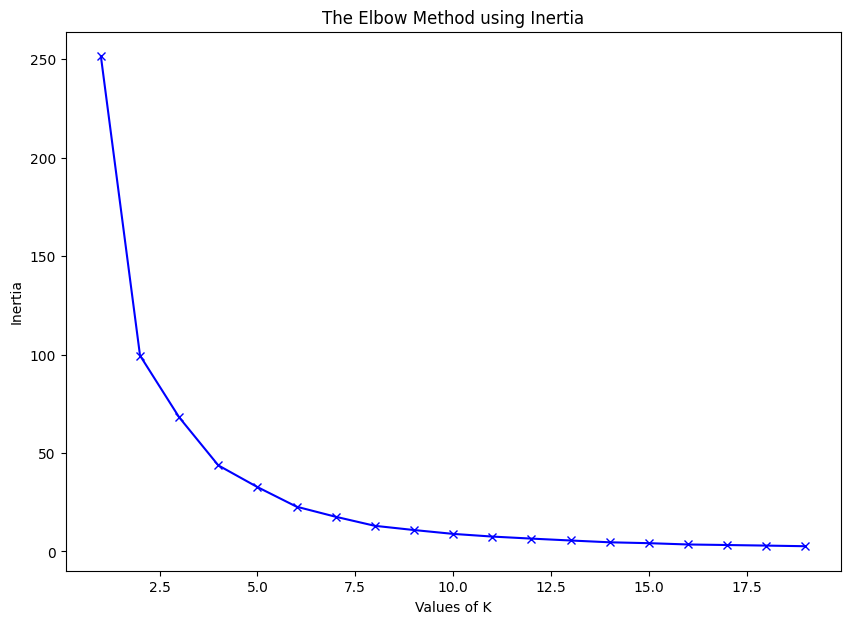

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(K_range, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


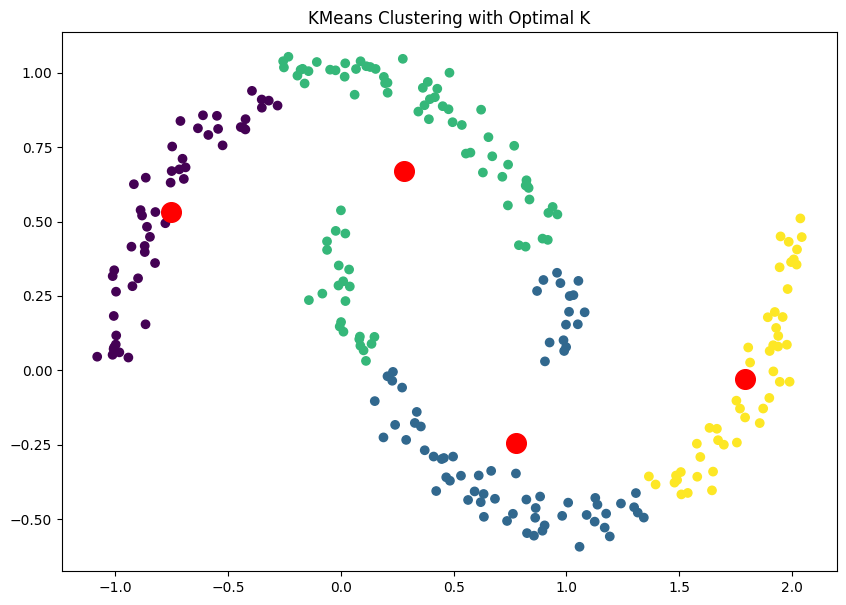

In [ ]:
# Based on the graph, a gook k is 4

kmeans_optimal = KMeans(n_clusters=4, random_state=100)
kmeans_optimal.fit(X)
y_kmeans_optimal = kmeans_optimal.predict(X)

# Scatter plot the results and color the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_optimal, cmap='viridis')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=200, c='red')
plt.title('KMeans Clustering with Optimal K')
plt.show()

## Question 4

- Try DBSCAN algorithm on the same data with the appropriate `eps` parameter value
- Scatter plot the results and color the clusters

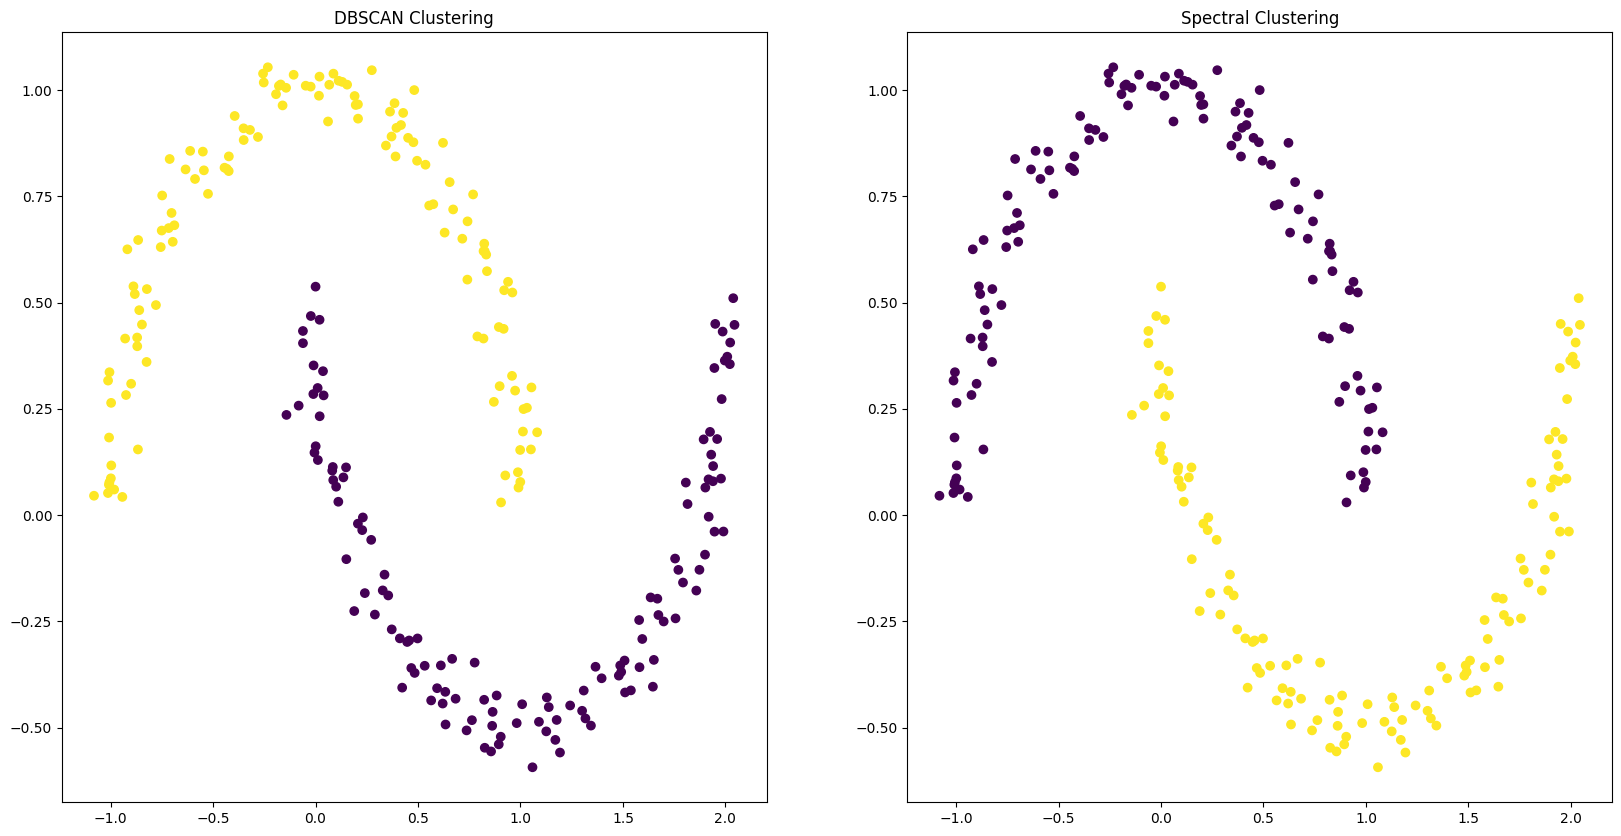

In [ ]:
# I've aslo found SpectralClustering as a method for non-linear, non-convex datasets
# The difference is that Spectral Clustering assigns all points to clusters.

from sklearn.cluster import DBSCAN, SpectralClustering
# Apply DBSCAN
dbscan = DBSCAN(eps=0.3)
y_dbscan = dbscan.fit_predict(X)

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10)
y_spectral = spectral.fit_predict(X)

# Plotting
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_spectral, cmap='viridis')
plt.title('Spectral Clustering')

# Impressive results
plt.show()


## Question 5
**Compare between DBSCAN and kmeans results on the same data. Why do you think you got those results??**

**ANSWER:**

DBSCAN can handle nested clusters, also assumes that clusters are globally homegeneous, which alligns perfectly with our data. But K-Means assumes non-convex linear clusters and tends to produce sperical/circular clusters.

## Question 6
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm showing the color of the clusters

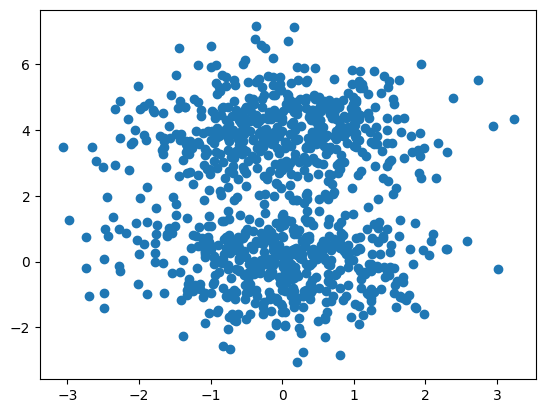

In [ ]:
np.random.seed(100)
rng = np.random.default_rng()
x = rng.standard_normal(1000)
y = np.concatenate([rng.standard_normal(500)+4, rng.standard_normal(500)])
plt.scatter(x,y)

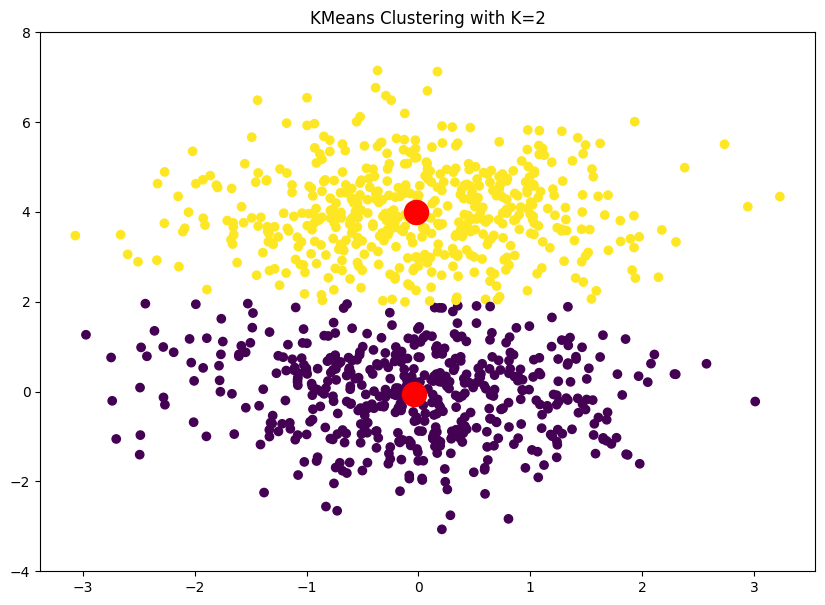

In [ ]:
data = np.array(list(zip(x, y)))

kmeans = KMeans(n_clusters=2, random_state=100)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.ylim(-4, 8)
plt.title('KMeans Clustering with K=2')
plt.show()

## Question 7
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm showing the color of the clusters

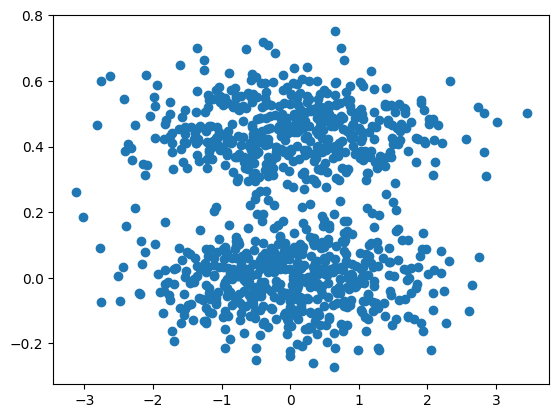

In [ ]:
np.random.seed(100)
rng = np.random.default_rng()
x = rng.standard_normal(1000)
y = np.concatenate([rng.standard_normal(500) + 4.5, rng.standard_normal(500)]) / 10
plt.scatter(x,y)

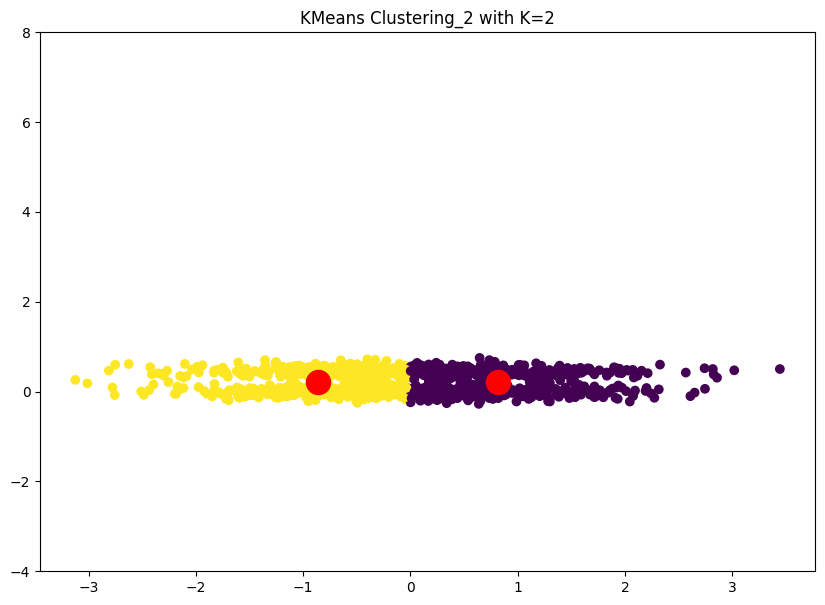

In [ ]:
data_2 = np.array(list(zip(x, y)))

kmeans_2 = KMeans(n_clusters=2, random_state=100)
kmeans_2.fit(data_2)
y_kmeans_2 = kmeans_2.predict(data_2)

plt.figure(figsize=(10, 7))
plt.scatter(data_2[:, 0], data_2[:, 1], c=y_kmeans_2, cmap='viridis')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s=300, c='red')
plt.ylim(-4, 8)
plt.title('KMeans Clustering_2 with K=2')
plt.show()

## Question 8
Why did kmeans fail to cluster the data in question 7 but succeeded in question 6?

**ANSWER**:

Scaling/Standardization affects the ability of K-Means algorithm to fit the data. In Question 7, there's a significant difference between x-axis and y-axis scales.

## Question 9

- Find a way to make kmeans succeed on the data and plot the results

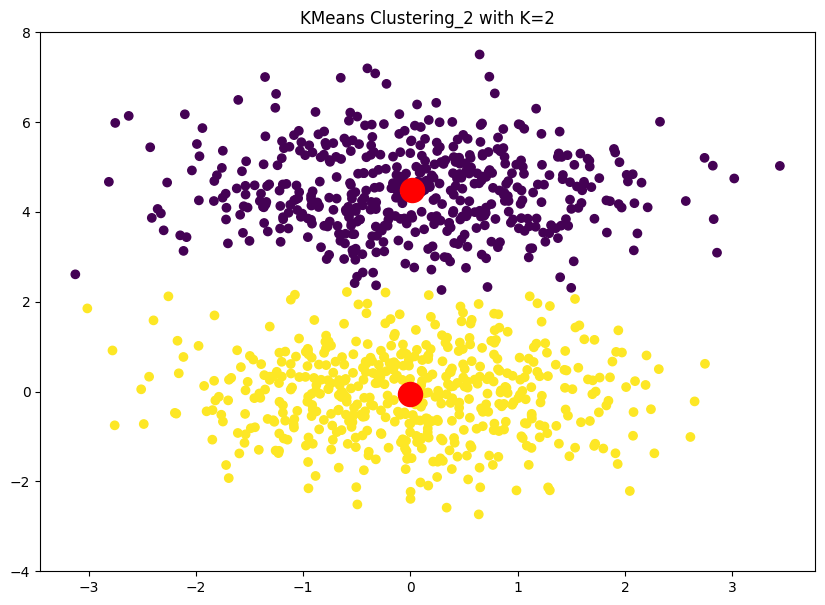

In [ ]:
# By multiplying y by 10
y *= 10
data_3 = np.array(list(zip(x, y)))

kmeans_3 = KMeans(n_clusters=2, random_state=100)
kmeans_3.fit(data_3)
y_kmeans_3 = kmeans_3.predict(data_3)

plt.figure(figsize=(10, 7))
plt.scatter(data_3[:, 0], data_3[:, 1], c=y_kmeans_3, cmap='viridis')
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], s=300, c='red')
plt.ylim(-4, 8)
plt.title('KMeans Clustering_2 with K=2')
plt.show()


## Question 10
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm showing the color of the clusters

In [ ]:
def create_dataset(plot_original = False):
    np.random.seed(100)
    x = np.random.normal(0, 1, 500)
    y = np.random.normal(0, 1, 500)
    X_1 = np.vstack((x, y)).T

    x = np.random.normal(6, 1, 500)
    X_2 = np.vstack((x, y)).T

    X = np.vstack((X_1, X_2))
    if plot_original:
        plt.scatter(X[:, 0], X[:, 1])
        plt.title('Generated Data')
        plt.axis('equal');
    # Scaling matrix
    sx, sy = 0.7, 3.4
    Scale = np.array([[sx, 0], [0, sy]])

    # Rotation matrix
    theta = 0.77*np.pi
    c, s = np.cos(theta), np.sin(theta)
    Rot = np.array([[c, -s], [s, c]])

    # Transformation matrix
    T = Scale.dot(Rot)
    X_t = X - np.array([3,0])
    X_t = X_t.dot(T)
    return X_t

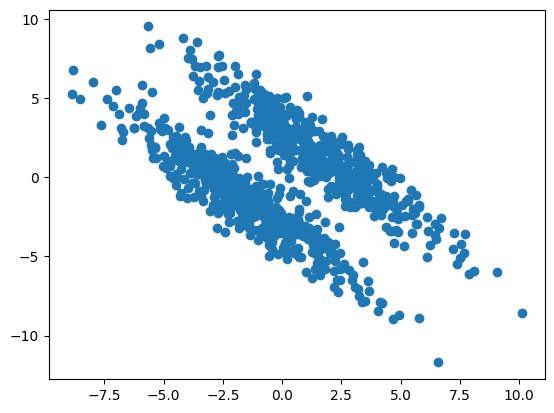

In [ ]:
X = create_dataset()
plt.scatter(X[:,0],X[:,1])

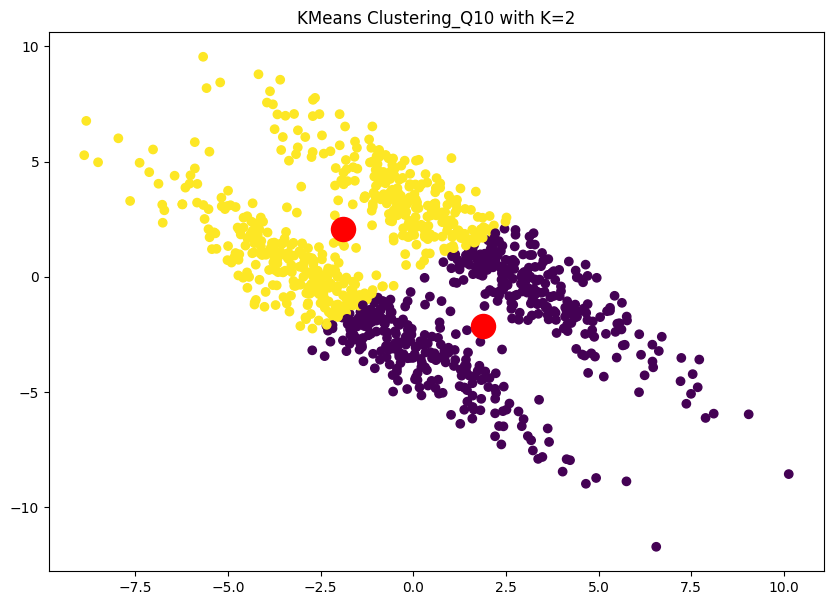

In [ ]:
kmeans_10 = KMeans(n_clusters=2, random_state=100)
kmeans_10.fit(X)
y_kmeans_10 = kmeans_10.predict(X)

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_10, cmap='viridis')
plt.scatter(kmeans_10.cluster_centers_[:, 0], kmeans_10.cluster_centers_[:, 1], s=300, c='red')
plt.title('KMeans Clustering_Q10 with K=2')
plt.show()

## Question 11
Why did kmeans fail to cluster the data in question 10 but succeeded in question 6?

**ANSWER**:

Because K-Means tends to produce spherical clusters, not elliptic ones.

## Question 12

1. Read the following blog -[link](https://janakiev.com/blog/covariance-matrix/#:~:text=Linear%20Transformations%20of%20the%20Data%20Set,-Next%20we%20will&text=which%20means%20that%20we%20can,transformed%20by%20Y%3DSX)-
2. Calculate a transformation that you can apply to the data to make kmeans succeed !!!
3. Plot the transformed data
4. Plot the kmeans result on the **ORIGINAL** data


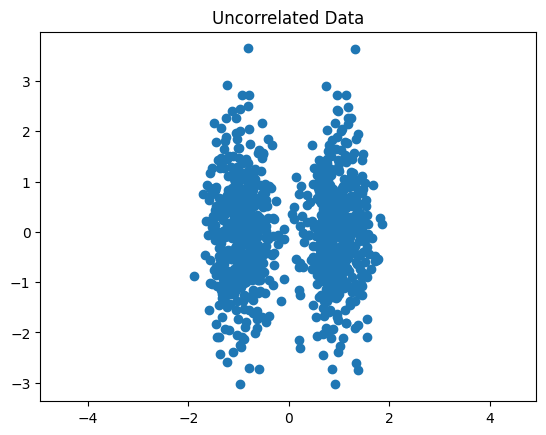

In [ ]:
# Calculate transformation and <uncorrelate> the data?? Plot transformed data
C = np.cov(X.T) # X is the Original Data

# Calculate eigenvalues
eVa, eVe = np.linalg.eig(C)

# Calculate transformation matrix from eigen decomposition
R, S = eVe, np.diag(np.sqrt(eVa))
T = R.dot(S).T # (1,2)

# Transform data with inverse transformation matrix T^-1
Z = X.dot(np.linalg.inv(T))

plt.scatter(Z[:, 0], Z[:, 1])
plt.title('Uncorrelated Data')
plt.axis('equal');


(-9.950462380078008,
 10.599601821929813,
 -3.0867518014512427,
 3.5298801031318474)

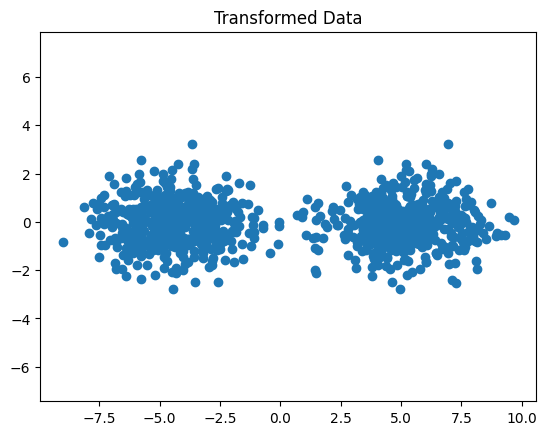

In [ ]:
# Center the matrix at the origin
ZZ = Z - np.mean(X, 0) # (3)

# Scaling matrix
sx, sy = 5, 0.9
Scale = np.array([[sx, 0], [0, sy]])

# Apply scaling matrix to X
Y = ZZ.dot(Scale) # (4)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal')

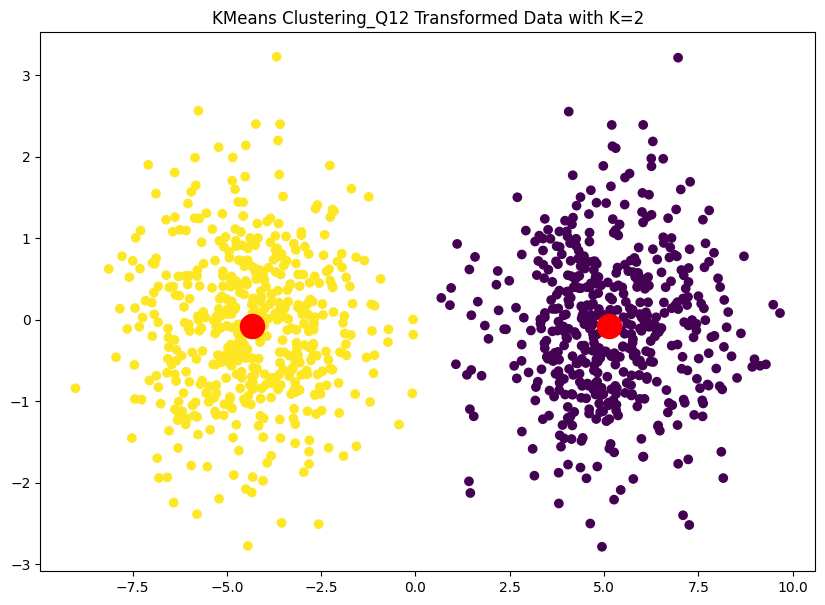

In [ ]:
# Train K-Means on the transformed data (Y) and plot it
kmeans_12 = KMeans(n_clusters=2, random_state=100)
kmeans_12.fit(Y)
y_kmeans_12 = kmeans_12.predict(Y)

plt.figure(figsize=(10, 7))
plt.scatter(Y[:, 0], Y[:, 1], c=y_kmeans_12, cmap='viridis')
plt.scatter(kmeans_12.cluster_centers_[:, 0], kmeans_12.cluster_centers_[:, 1], s=300, c='red')
plt.title('KMeans Clustering_Q12 Transformed Data with K=2')
plt.show()

In [ ]:
# Steps to transform back to the ORIGINAL DATA??? for reference to transform the centers

# Inverse transformations (4)

# Inverse scaling (4)
Scale_inv = np.linalg.inv(Scale)
Y_inv_scaled = Y.dot(Scale_inv)

# Inverse centering (3)
Y_inv_centered = Y_inv_scaled + np.mean(X, 0)

# Inverse rotation and scaling (2,1)
X_reconstructed = Y_inv_centered.dot(T)


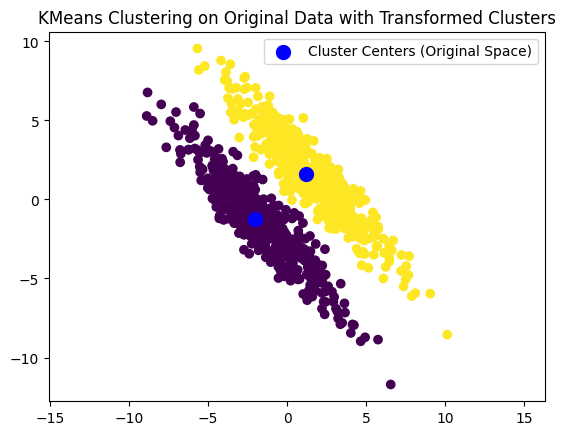

In [ ]:
# Plot K-Means result on the ORIGINAL DATA

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_12, cmap='viridis')

# Transform cluster centers back to original space
cluster_centers_transformed_back = kmeans_12.cluster_centers_.dot(Scale_inv).dot(T) + np.mean(X, 0)
plt.scatter(cluster_centers_transformed_back[:, 0], cluster_centers_transformed_back[:, 1], s=100, c='blue', label='Cluster Centers (Original Space)')

plt.title('KMeans Clustering on Original Data with Transformed Clusters')
plt.legend()
plt.axis('equal')
plt.show()

# Part 2 PCA

In [ ]:
from matplotlib.colors import ListedColormap


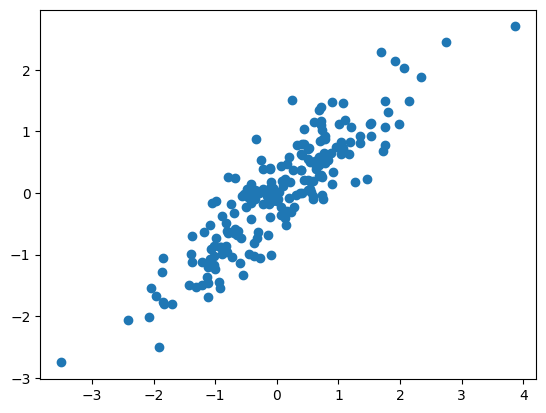

In [ ]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Question 1

Write your own PCA function that will return:
* The sorted eigenvectors of all principal components
* The corresponding eigenvalues
* The transformed data
- Function takes in the data only
    - You can use np.linalg.eig

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [ ]:
#### YOUR FUNCTION

def pca(X):

  X = X - np.mean(X,0)

  cov_mat = np.cov(X.T)
  eigen_vals, eigen_vects = np.linalg.eig(cov_mat)

  # Sort descendingly
  sorted_indices = np.argsort(eigen_vals)[::-1]
  sorted_eigenvalues = eigen_vals[sorted_indices]
  sorted_eigenvectors = eigen_vects[:, sorted_indices]

  # Projection to get
  X_reduced = X.dot(sorted_eigenvectors)

  return sorted_eigenvectors, sorted_eigenvalues, X_reduced

## Question 2
- Apply your PCA function to the data given above
- print the pca eigenvalues
- plot the transformed data
- plot the PCA eigenvectors over the ORIGINAL data with the correct directions!

In [ ]:
## Apply your function
sorted_eigenvectors, sorted_eigenvalues, X_transformed = pca(X)

In [ ]:
print("Eigenvalues are: ", sorted_eigenvalues)

Eigenvalues are:  [1.82927343 0.10246373]


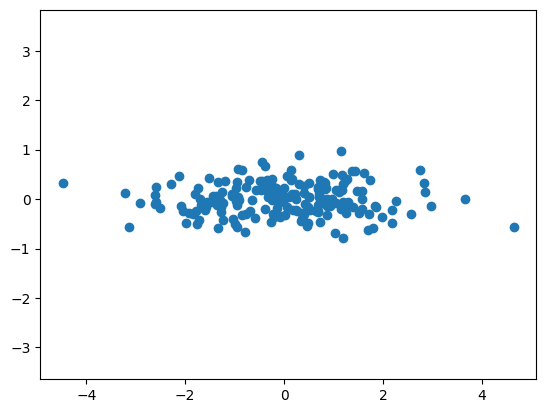

In [ ]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.axis('equal');

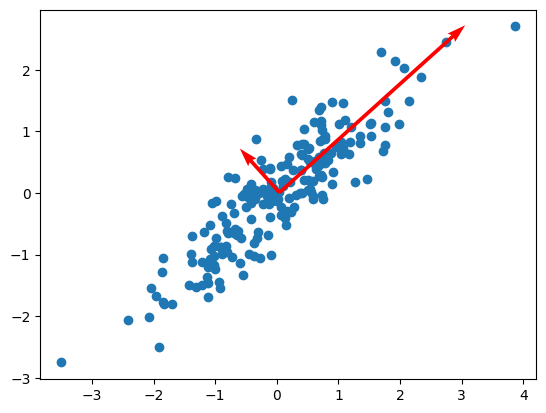

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');
mean_X = np.mean(X,0)
# Plotting eigenvectors
for i in range(sorted_eigenvectors.shape[1]):
    eigenvector = sorted_eigenvectors[:, i]
    start = mean_X
    end = start + 3 * eigenvector * np.sqrt(sorted_eigenvalues[i])
    plt.quiver(start[0], start[1], end[0] - start[0], end[1] - start[1], color='red', angles='xy', scale_units='xy', scale=1)
plt.show()

## Question 3

- Apply sklearn's PCA function to the same data
- print the pca eigenvalues

In [ ]:
# sklearn's PCA function uses SVD approach
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
print("Eigenvalues are: ", pca.explained_variance_)


Eigenvalues are:  [1.82927343 0.10246373]
